In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import classification_report
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split , cross_val_score , cross_validate , cross_val_predict
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier , RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import chi2, SelectKBest, f_classif
from sklearn import metrics

from sklearn.linear_model import LogisticRegression , Perceptron
from sklearn.metrics import confusion_matrix , roc_auc_score , precision_recall_curve , roc_curve
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

C:\Users\sejal Jadev\anaconda3\lib\site-packages\dask\dataframe\utils.py:367: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\Users\sejal Jadev\anaconda3\lib\site-packages\dask\dataframe\utils.py:367: FutureWarning:

pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\Users\sejal Jadev\anaconda3\lib\site-packages\dask\dataframe\utils.py:367: FutureWarning:

pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



In [2]:
data = pd.read_excel("lead_data.xlsx")

In [3]:
data.head()

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaT,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaT,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,2022-08-31,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaT,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaT,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [4]:
data.columns

Index(['Unnamed: 0', 'Agent_id', 'status', 'lost_reason', 'budget', 'lease',
       'movein', 'source', 'source_city', 'source_country', 'utm_source',
       'utm_medium', 'des_city', 'des_country', 'room_type', 'lead_id'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46608 entries, 0 to 46607
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      46608 non-null  int64         
 1   Agent_id        46608 non-null  object        
 2   status          46608 non-null  object        
 3   lost_reason     43244 non-null  object        
 4   budget          42908 non-null  object        
 5   lease           44267 non-null  object        
 6   movein          32970 non-null  datetime64[ns]
 7   source          46608 non-null  object        
 8   source_city     46608 non-null  object        
 9   source_country  46608 non-null  object        
 10  utm_source      46608 non-null  object        
 11  utm_medium      46608 non-null  object        
 12  des_city        46608 non-null  object        
 13  des_country     46608 non-null  object        
 14  room_type       23061 non-null  object        
 15  le

In [6]:
data.status.unique()

array(['LOST', 'WON', 'OPPORTUNITY', 'CONTACTED', 'PROCESSING',
       'IMPORTANT'], dtype=object)

In [7]:
data.shape

(46608, 16)

In [8]:
new_data = data[(data.status== "LOST") | (data.status== "WON")] ; new_data.shape

(46317, 16)

In [9]:
new_data.status.unique()

array(['LOST', 'WON'], dtype=object)

In [10]:
new_data.drop("Unnamed: 0" , axis = 1 , inplace = True)

In [11]:
new_data.drop("Agent_id" , axis = 1 , inplace = True)

In [12]:
new_data.isna().sum()

status                0
lost_reason        3073
budget             3694
lease              2336
movein            13610
source                0
source_city           0
source_country        0
utm_source            0
utm_medium            0
des_city              0
des_country           0
room_type         23491
lead_id               0
dtype: int64

In [13]:
new_data.drop("room_type" , axis = 1 , inplace = True)

In [14]:
new_data.lost_reason.fillna(new_data.lost_reason.mode()[0] , inplace = True)

In [15]:
new_data.lost_reason.mode()[0]

'Low availability'

In [16]:
new_data.lost_reason.isna().sum()

0

In [17]:
new_data.lost_reason.value_counts()

Low availability                  11965
Not responding                     7827
Not interested                     6449
Low budget                         5505
Wants private accommodation        2781
Short stay                         2264
Not a student                      1518
Just Enquiring                     1263
Inadequate details                  827
Semester stay                       817
Booked with manager                 676
Junk lead                           629
Booked on campus accommodation      613
Supply issue                        538
No supply                           534
Not serving in that region          411
Repeat lead                         394
Booked with competitor              356
Not going to university             329
Distance issue                      219
Junk lead/ Just Enquiring           147
Lead issue                          127
Looking for admission                41
Didn't respond in time               35
Visa/admission denied                17


In [18]:
fe = new_data.groupby("lost_reason").size() ; fe 

lost_reason
Booked on campus accommodation      613
Booked with competitor              356
Booked with manager                 676
Cross sell                            1
Didn't respond in time               35
Distance issue                      219
Guarantor issue                      17
Inadequate details                  827
Junk lead                           629
Junk lead/ Just Enquiring           147
Just Enquiring                     1263
Lead issue                          127
Looking for Scholarship               8
Looking for admission                41
Looking for loan                      5
Low availability                  11965
Low budget                         5505
No supply                           534
Not a student                      1518
Not going to university             329
Not interested                     6449
Not responding                     7827
Not serving in that region          411
Repeat lead                         394
Semester stay               

In [19]:
fe_ = fe/len(new_data)

In [20]:
new_data["lost_reason_freq"] = new_data["lost_reason"].map(fe_).round(2)
new_data.lost_reason_freq

0        0.17
1        0.12
2        0.17
3        0.12
4        0.01
         ... 
46603    0.26
46604    0.02
46605    0.26
46606    0.26
46607    0.26
Name: lost_reason_freq, Length: 46317, dtype: float64

In [21]:
for i in new_data.lease.value_counts():
    print(i)

11000
7538
6451
3952
2753
2248
1644
1217
956
932
840
572
470
450
275
169
147
136
90
89
86
83
81
75
71
70
67
64
62
58
54
51
44
44
36
35
30
29
26
25
25
24
24
23
21
19
19
18
18
18
18
16
15
15
15
15
14
14
13
13
13
13
13
12
12
12
12
12
11
11
11
11
11
11
10
10
10
10
9
9
8
8
7
7
6
5
5
5
5
5
5
5
4
4
4
4
4
4
4
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [22]:
new_data.budget.fillna(new_data.budget.mode()[0] , inplace = True)

In [23]:
new_data.lease.fillna(new_data.lease.mode()[0] , inplace = True)

In [24]:
new_data.movein.unique()

array([                          'NaT', '2022-08-31T00:00:00.000000000',
       '2022-09-08T00:00:00.000000000', '2022-09-15T00:00:00.000000000',
       '2022-09-02T00:00:00.000000000', '2022-09-04T00:00:00.000000000',
       '2022-08-09T00:00:00.000000000', '2022-09-16T00:00:00.000000000',
       '2022-08-30T00:00:00.000000000', '2022-09-10T00:00:00.000000000',
       '2022-09-09T00:00:00.000000000', '2022-09-01T00:00:00.000000000',
       '2022-09-18T00:00:00.000000000', '2022-09-06T00:00:00.000000000',
       '2022-09-30T00:00:00.000000000', '2022-09-25T00:00:00.000000000',
       '2022-09-29T00:00:00.000000000', '2022-09-14T00:00:00.000000000',
       '2022-11-30T00:00:00.000000000', '2022-09-24T00:00:00.000000000',
       '2023-07-05T00:00:00.000000000', '2023-01-07T00:00:00.000000000',
       '2022-09-20T00:00:00.000000000', '2023-07-01T00:00:00.000000000',
       '2022-07-16T00:00:00.000000000', '2023-09-09T00:00:00.000000000',
       '2023-01-01T00:00:00.000000000', '2023-06-26

In [25]:
new_data['movein'].mode()[0]

Timestamp('2022-09-10 00:00:00')

In [26]:
new_data['movein'].fillna(datetime.datetime(2022, 9, 10) , inplace = True)


In [27]:
new_data.isna().sum()

status              0
lost_reason         0
budget              0
lease               0
movein              0
source              0
source_city         0
source_country      0
utm_source          0
utm_medium          0
des_city            0
des_country         0
lead_id             0
lost_reason_freq    0
dtype: int64

In [28]:
new_data.lease = new_data.lease.astype(str)
new_data.lease = new_data.movein.astype(str)

In [29]:
l = ["budget" , "lease" , "movein"]
for i in l:
    fe = new_data.groupby(i).size()
    fe_ = fe/len(new_data)
    new_data[i + "_freq"] = new_data[i].map(fe_).round(2)
    

In [30]:
new_data.head()

,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,lead_id,lost_reason_freq,budget_freq,lease_freq,movein_freq
0,LOST,Not responding,£60 - £120 Per week,2022-09-10,2022-09-10,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...,0.17,0.29,0.35,0.35
1,LOST,Low budget,£60 - £120 Per week,2022-09-10,2022-09-10,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...,0.12,0.29,0.35,0.35
2,LOST,Not responding,£121 - £180 Per Week,2022-08-31,2022-08-31,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...,0.17,0.19,0.05,0.05
3,LOST,Low budget,0-0,2022-09-10,2022-09-10,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...,0.12,0.12,0.35,0.35
4,LOST,Junk lead,£60 - £120 Per week,2022-09-10,2022-09-10,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...,0.01,0.29,0.35,0.35


In [31]:
new_data.source.value_counts()

7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8    19092
9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0     5951
7bcfca0e9d73371699b0adbf1c691e02108fa64f02f4dbe24a0217f139a9b916     3794
ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9eaa29e3f169d2ca43b2b     3586
146fb4ecbe78caa24102bbaac12e2559a8c8e32fb116d36e3553a709fce40549     2210
                                                                    ...  
6a60107e3532ad81fc9a5b81e8c6ebc09776c62d2c31be9c921d0273f491166d        1
eb77035a1aec7874c4294ba3a72068110c630add1884e7df94be3f5e80e107ea        1
e7f73ae35fb85dba0110642f19c4f6aaa1c2e6498694506b262306b543c77f41        1
ffda956ad9e38c62bf6218b66a7f53be79adbcc876aeed4147dfcf1a33d004c7        1
93bee3e177d17c128e6a6af7b88fd675d7ec729b1a88ae13c582248dfd702378        1
Name: source, Length: 683, dtype: int64

In [32]:
for i in new_data.source:
    if i == '9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0':
        i = new_data.source.replace(i , new_data.source.mode()[0] , inplace = True)

In [33]:
r = []
for i in new_data.source_city:
    if i == '9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0':
        r.append(i)
print(len(r))

8831


In [34]:
new_data.source_city.mode()[0]

'9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0'

In [35]:
new_data.source_city.value_counts()

9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0    8831
ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7    3020
b384863fa1f6e091164b74219726eee0b9dd47776b91a4dc71fd0516630d21ec    1431
9f2ba6981e36ea0fca6c16f42e6413d788d2a7499b8b7f418c5d76f12d191f02     854
7d1550b844ff586a6023216c06263105eed0a849a2a1f69bb8862ab288d8cdab     752
                                                                    ... 
67e6f8c1f6f47e01ab6fe1cbbc3d4115d71f63c6ebf82a8713a6ac04a5b5236c       1
c2cedb3b32de2ae419a258d76f4fa82ee302441fbae041acf9a13770dfa18eb0       1
e2f36920bce1be5e4c94b165dcbd09cf454f5990d8869c5cc483e0723e34595c       1
06065eeea31a9f7eeaf11e335f9a6a67235fc40f12d50b06b84fcbcb5ed70dd2       1
d650065b53c2284b98e575d37e1be820599bf33baff5e147770547a984975d2f       1
Name: source_city, Length: 4316, dtype: int64

In [36]:
idx = []
for i in new_data[new_data.source_city == "9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0"].index:
    idx.append(i)

In [37]:
len(idx)

8831

In [38]:
new_data.drop(idx , axis =0 , inplace = True)

In [39]:
new_data.shape

(37486, 17)

In [40]:
46317-37486

8831

In [41]:
new_data.lead_id.value_counts()

96ea4e2bf04496c044745938c0299c264c3f4ba079e57267aab3e807e1008861    2
d2f8f193b0627e085e5dc8bd7ef00dc22e3137c92a2ecb4dc4beec91cb80a501    2
383ca95b7e3db24fb86364986a44e1e64a52ee19e426650aeea3ea08138106a3    2
a56ac591138054b474d0269867794c485a31198595805f249447fe7bc42126d4    2
1adc7bb38b174380614be6836fa1718c611f51fee15888406454e0145c9b1671    2
                                                                   ..
a8f1745614fac728927a0bd7241bd185039de7995cea5568dc1d6b6c8f8a0b5f    1
fc7099c9185940c71d6945f6835c9511da88e9bed47faa62a1fdaadaf6627b54    1
4ea5d26c3c8261b910673d41e98b0713f6bc5ada343b137522f68ae4f86249ed    1
7b35ed97455cb4a467a247d778c9dbe80a42973355f4d21b546662a2de9d9d22    1
7520a8abba2b44d7f37c0ddbe5f7f3d87540b2b7a670e9835c26f93767275d29    1
Name: lead_id, Length: 26686, dtype: int64

In [42]:
for i in new_data.source_country:
    if i == '9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0':
        i = new_data.source_country.replace(i , new_data.source_country.mode()[0] , inplace = True)

In [43]:
for i in new_data.utm_source:
    if i == '9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0':
        i = new_data.utm_source.replace(i , new_data.utm_source.mode()[0] , inplace = True)

In [44]:
for i in new_data.utm_medium:
    if i == '9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0':
        i = new_data.utm_medium.replace(i , new_data.utm_medium.mode()[0] , inplace = True)

In [45]:
for i in new_data.des_city:
    if i == '9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0':
        i = new_data.des_city.replace(i , new_data.des_city.mode()[0] , inplace = True)

In [46]:
for i in new_data.des_country:
    if i == '9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0':
        i = new_data.des_country.replace(i , new_data.des_country.mode()[0] , inplace = True)

In [47]:
new_data.drop("lead_id" , axis = 1 , inplace = True)

In [48]:
new_data.columns

Index(['status', 'lost_reason', 'budget', 'lease', 'movein', 'source',
       'source_city', 'source_country', 'utm_source', 'utm_medium', 'des_city',
       'des_country', 'lost_reason_freq', 'budget_freq', 'lease_freq',
       'movein_freq'],
      dtype='object')

In [49]:
l = ["source" , "source_city" ,'source_country', 'utm_source', 'utm_medium', 'des_city', 'des_country']
for i in l:
    fe = new_data.groupby(i).size()
    fe_ = fe/len(new_data)
    new_data[i + "_freq"] = new_data[i].map(fe_).round(2)

In [50]:
new_data.columns

Index(['status', 'lost_reason', 'budget', 'lease', 'movein', 'source',
       'source_city', 'source_country', 'utm_source', 'utm_medium', 'des_city',
       'des_country', 'lost_reason_freq', 'budget_freq', 'lease_freq',
       'movein_freq', 'source_freq', 'source_city_freq', 'source_country_freq',
       'utm_source_freq', 'utm_medium_freq', 'des_city_freq',
       'des_country_freq'],
      dtype='object')

In [51]:
new_data.head()

,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,...,budget_freq,lease_freq,movein_freq,source_freq,source_city_freq,source_country_freq,utm_source_freq,utm_medium_freq,des_city_freq,des_country_freq
2,LOST,Not responding,£121 - £180 Per Week,2022-08-31,2022-08-31,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,...,0.19,0.05,0.05,0.61,0.01,0.50,0.82,0.88,0.08,0.97
3,LOST,Low budget,0-0,2022-09-10,2022-09-10,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,...,0.12,0.35,0.35,0.10,0.00,0.50,0.82,0.88,0.01,0.97
5,LOST,Wants private accommodation,120,2022-09-10,2022-09-10,7bcfca0e9d73371699b0adbf1c691e02108fa64f02f4db...,7b7f15f9ffbeb905caaee265ac39d267d0512ab5333f2f...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,...,0.01,0.35,0.35,0.10,0.01,0.19,0.82,0.88,0.00,0.97
6,LOST,Short stay,0-0,2022-09-10,2022-09-10,9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d79...,3c1def48af45cb9748302f34e57f2cbeb866de95beb0d2...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,4688fa9ce4f64d0451be91f30a3de24a1c1c41635bd221...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,...,0.12,0.35,0.35,0.06,0.00,0.50,0.01,0.88,0.17,0.97
7,LOST,Wants private accommodation,£181 - £240 Per Week,2022-09-08,2022-09-08,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,8593b9db65212160979d946950601c26622a219c80f1f1...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,...,0.05,0.01,0.01,0.61,0.01,0.50,0.82,0.88,0.05,0.97


In [52]:
new_data.drop(['lost_reason', 'budget', 'lease', 'movein', 'source',
       'source_city', 'source_country', 'utm_source', 'utm_medium', 'des_city',
       'des_country'] , axis = 1 , inplace = True)

In [53]:
new_data.head()

,status,lost_reason_freq,budget_freq,lease_freq,movein_freq,source_freq,source_city_freq,source_country_freq,utm_source_freq,utm_medium_freq,des_city_freq,des_country_freq
2,LOST,0.17,0.19,0.05,0.05,0.61,0.01,0.50,0.82,0.88,0.08,0.97
3,LOST,0.12,0.12,0.35,0.35,0.10,0.00,0.50,0.82,0.88,0.01,0.97
5,LOST,0.06,0.01,0.35,0.35,0.10,0.01,0.19,0.82,0.88,0.00,0.97
6,LOST,0.05,0.12,0.35,0.35,0.06,0.00,0.50,0.01,0.88,0.17,0.97
7,LOST,0.06,0.05,0.01,0.01,0.61,0.01,0.50,0.82,0.88,0.05,0.97


In [54]:
column_list = new_data.columns.values.tolist()

for col in column_list:
    print('\033[1m  {}  \033[0m'.format(col))
    print(new_data[col].unique())
    print("Number of total unique value for {} feature is {}:".format(col , len(new_data[col].unique()) ))
    print('\n') 

  status  
['LOST' 'WON']
Number of total unique value for status feature is 2:


  lost_reason_freq  
[0.17 0.12 0.06 0.05 0.01 0.26 0.14 0.03 0.   0.02]
Number of total unique value for lost_reason_freq feature is 10:


  budget_freq  
[0.19 0.12 0.01 0.05 0.03 0.   0.02 0.29]
Number of total unique value for budget_freq feature is 8:


  lease_freq  
[0.05 0.35 0.01 0.03 0.   0.02]
Number of total unique value for lease_freq feature is 6:


  movein_freq  
[0.05 0.35 0.01 0.03 0.   0.02]
Number of total unique value for movein_freq feature is 6:


  source_freq  
[0.61 0.1  0.06 0.01 0.   0.02]
Number of total unique value for source_freq feature is 6:


  source_city_freq  
[0.01 0.   0.04 0.02 0.08]
Number of total unique value for source_city_freq feature is 5:


  source_country_freq  
[0.5  0.19 0.01 0.03 0.05 0.  ]
Number of total unique value for source_country_freq feature is 6:


  utm_source_freq  
[0.82 0.01 0.05 0.   0.04 0.03 0.02]
Number of total unique value for utm_s

In [55]:
y = new_data["status"]

In [56]:
x = new_data.iloc[: , 1:]

In [57]:
x

,lost_reason_freq,budget_freq,lease_freq,movein_freq,source_freq,source_city_freq,source_country_freq,utm_source_freq,utm_medium_freq,des_city_freq,des_country_freq
2,0.17,0.19,0.05,0.05,0.61,0.01,0.50,0.82,0.88,0.08,0.97
3,0.12,0.12,0.35,0.35,0.10,0.00,0.50,0.82,0.88,0.01,0.97
5,0.06,0.01,0.35,0.35,0.10,0.01,0.19,0.82,0.88,0.00,0.97
6,0.05,0.12,0.35,0.35,0.06,0.00,0.50,0.01,0.88,0.17,0.97
7,0.06,0.05,0.01,0.01,0.61,0.01,0.50,0.82,0.88,0.05,0.97
...,...,...,...,...,...,...,...,...,...,...,...
46603,0.26,0.29,0.05,0.05,0.61,0.02,0.19,0.82,0.88,0.01,0.97
46604,0.02,0.29,0.01,0.01,0.61,0.02,0.19,0.82,0.88,0.01,0.97
46605,0.26,0.02,0.01,0.01,0.61,0.02,0.19,0.82,0.88,0.17,0.97
46606,0.26,0.00,0.01,0.01,0.06,0.00,0.01,0.02,0.02,0.17,0.97


In [58]:
y[y == "LOST"] = 0 
y[y == "WON"] = 1 

In [59]:
y.value_counts()

0    34961
1     2525
Name: status, dtype: int64

In [60]:
x.shape , y.shape

((37486, 11), (37486,))

In [61]:
def get_feature_correlation(df, top_n=None, corr_method='spearman',
                            remove_duplicates=True, remove_self_correlations=True):
    
    corr_matrix_abs = df.corr(method=corr_method).abs()
    corr_matrix_abs_us = corr_matrix_abs.unstack()
    sorted_correlated_features = corr_matrix_abs_us \
        .sort_values(kind="quicksort", ascending=False) \
        .reset_index()

    if remove_self_correlations:
        sorted_correlated_features = sorted_correlated_features[
            (sorted_correlated_features.level_0 != sorted_correlated_features.level_1)
        ]
        
    if remove_duplicates:
        sorted_correlated_features = sorted_correlated_features.iloc[:-2:2]

    sorted_correlated_features.columns = ['Feature 1', 'Feature 2', 'Correlation (abs)'] 

    if top_n:
        return sorted_correlated_features[:top_n]

    return sorted_correlated_features

In [62]:
get_feature_correlation(new_data, top_n=None, corr_method='spearman',
                            remove_duplicates=True, remove_self_correlations=True)
    

,Feature 1,Feature 2,Correlation (abs)
8,movein_freq,lease_freq,1.000000
13,budget_freq,source_freq,0.700064
15,source_freq,movein_freq,0.575397
17,movein_freq,source_freq,0.575397
19,utm_source_freq,utm_medium_freq,0.540456
21,lease_freq,budget_freq,0.394639
23,budget_freq,lease_freq,0.394639
25,utm_medium_freq,des_country_freq,0.360733
27,source_freq,utm_source_freq,0.330388
29,source_freq,utm_medium_freq,0.311817


movein_freq and	lease_freq	are highly correlated

budget_freq	and source_freq are also highly correlated	

C:\Users\sejal Jadev\anaconda3\lib\site-packages\seaborn\distributions.py:453: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

C:\Users\sejal Jadev\anaconda3\lib\site-packages\seaborn\distributions.py:454: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)



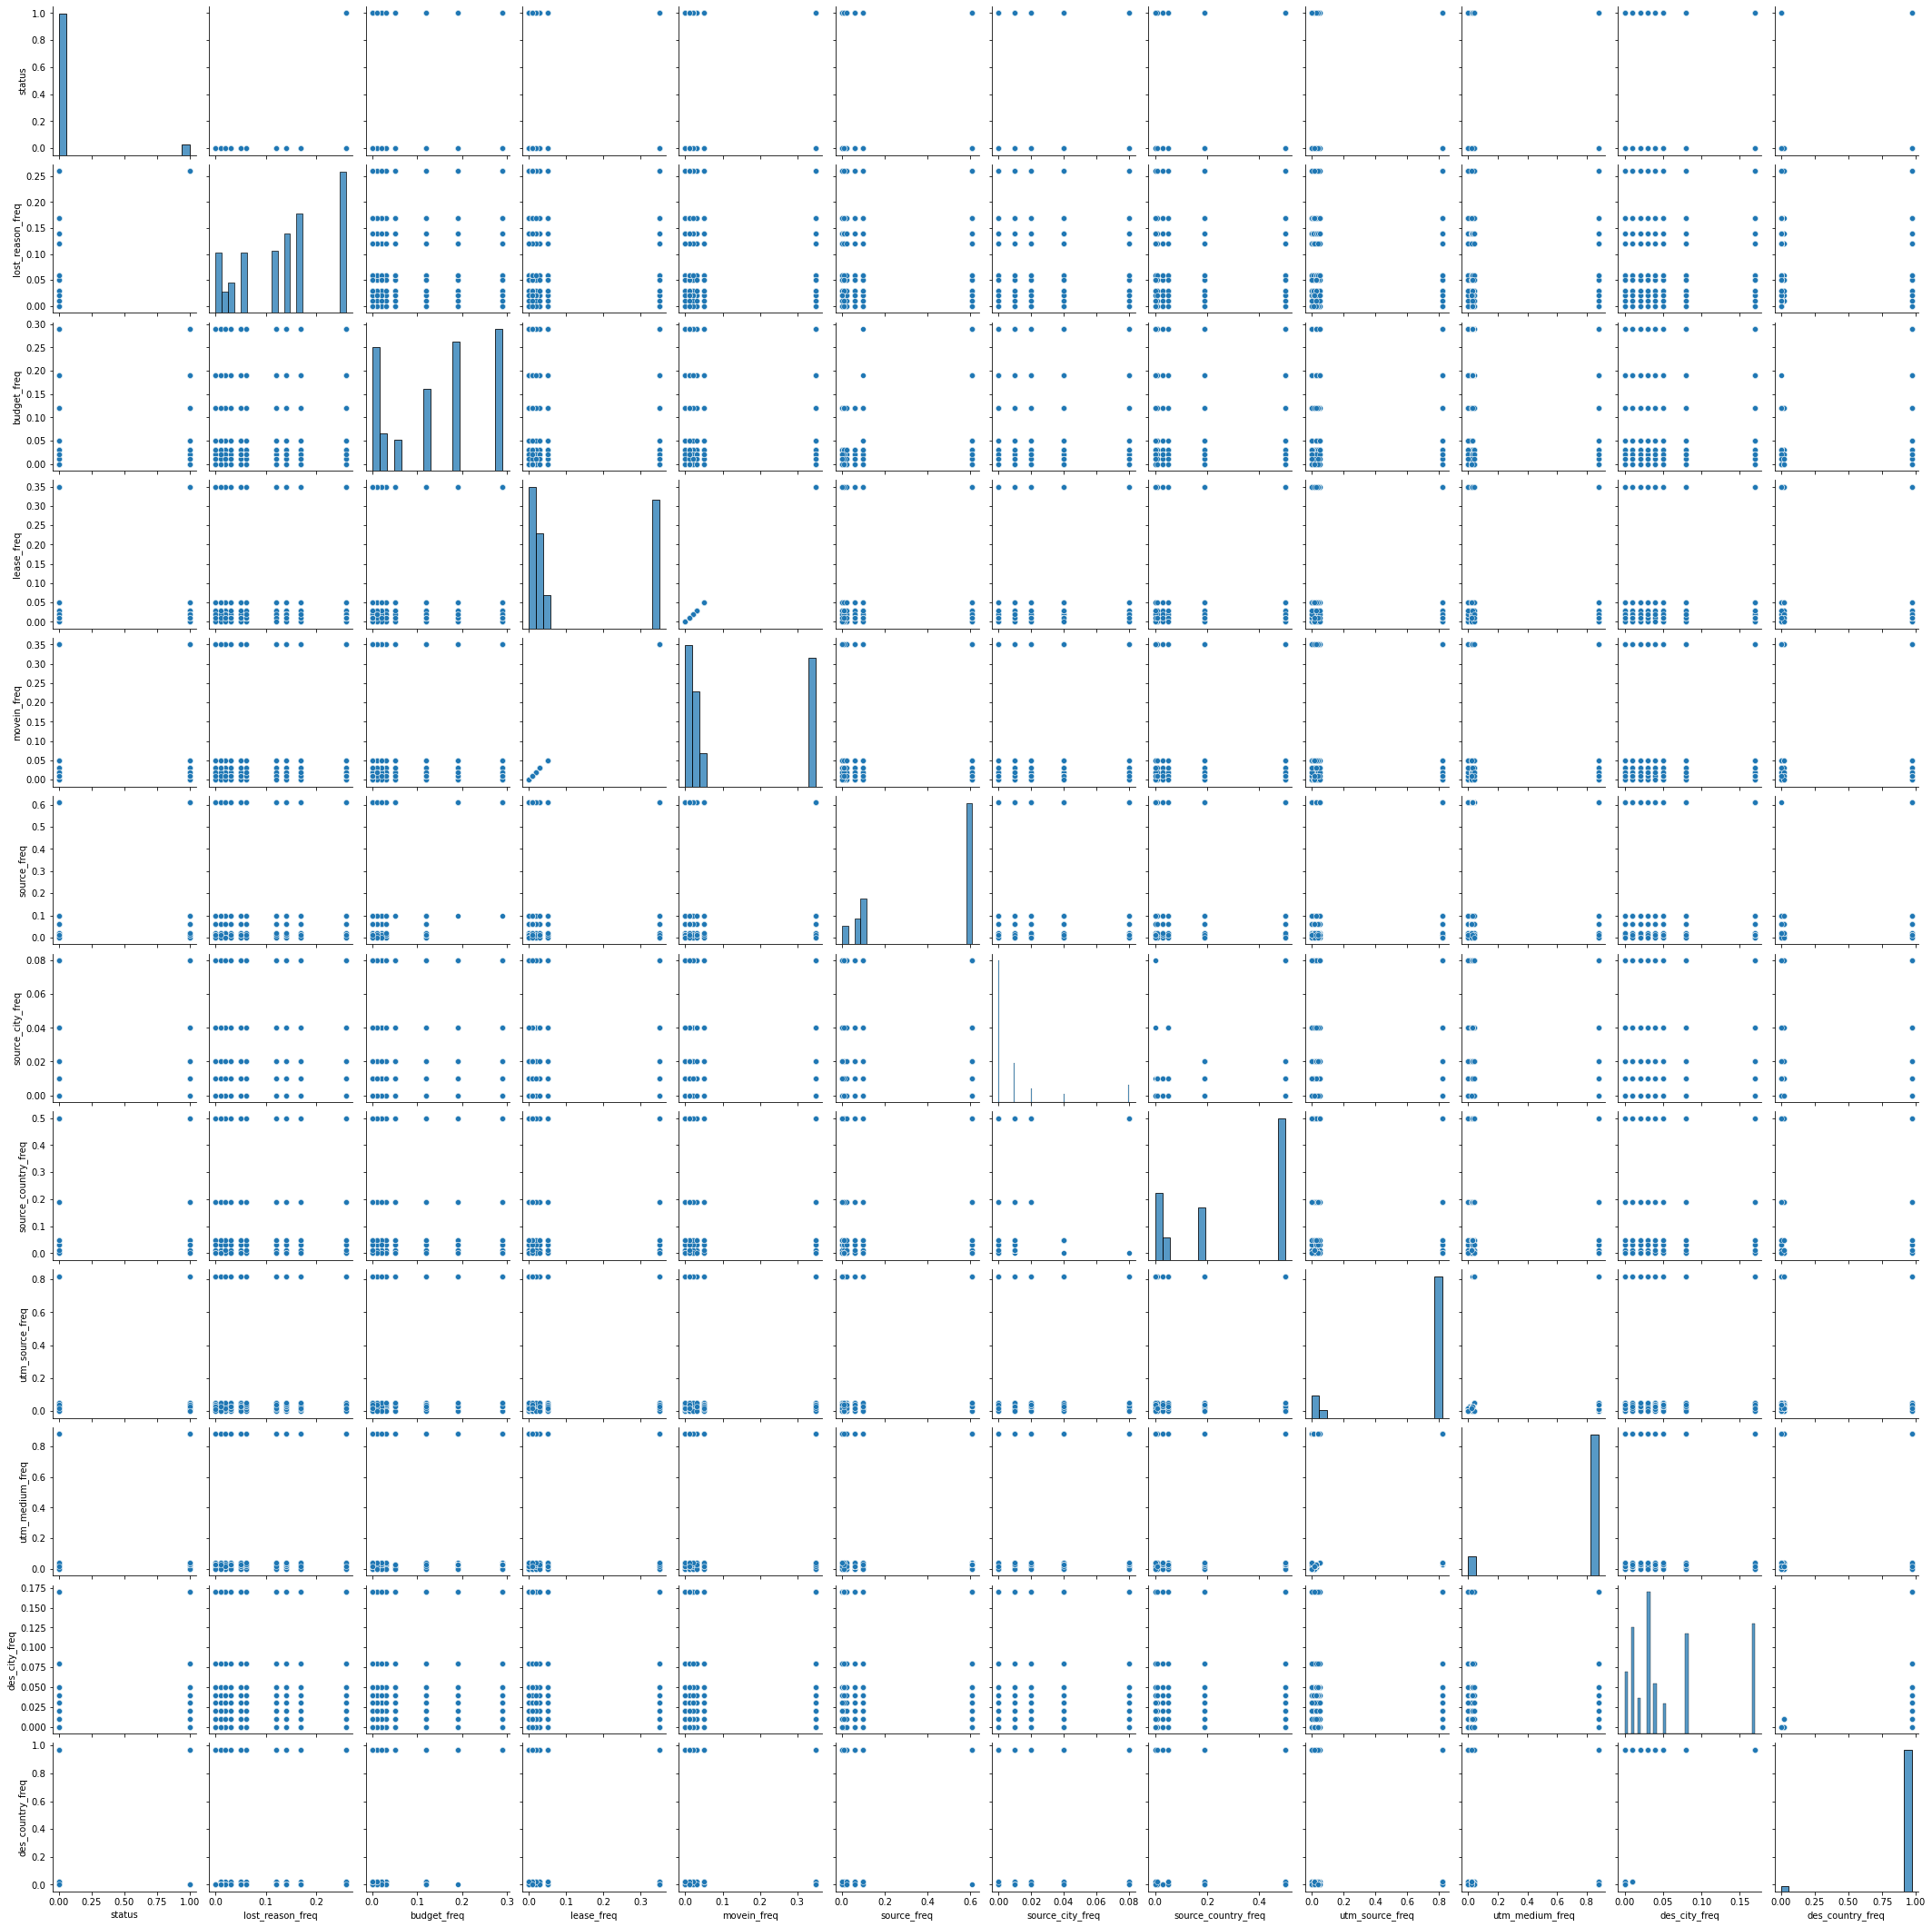

In [63]:
sns.pairplot(new_data)

In [126]:
pca = PCA()

In [127]:
pca.fit(x , y)

PCA()

In [128]:
print(pca.explained_variance_ratio_)

[4.18465398e-01 2.01033403e-01 1.29660647e-01 1.04870152e-01
 6.14250074e-02 4.17520783e-02 1.93502444e-02 1.48009578e-02
 7.41487533e-03 1.22723663e-03 1.60662572e-34]


In [129]:
print(pca.feature_names_in_)

['lost_reason_freq' 'budget_freq' 'lease_freq' 'movein_freq' 'source_freq'
 'source_city_freq' 'source_country_freq' 'utm_source_freq'
 'utm_medium_freq' 'des_city_freq' 'des_country_freq']


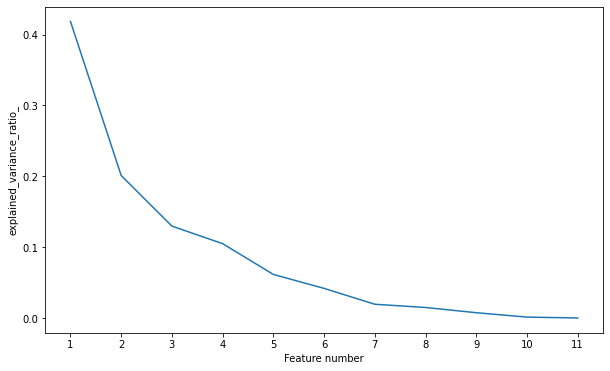

In [130]:
loc = np.arange(1,12,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,12), pca.explained_variance_ratio_)
plt.xticks(loc)
plt.xlabel('Feature number')
plt.ylabel('explained_variance_ratio_')
plt.show()

In [136]:
x_drop = x[['lost_reason_freq', 'budget_freq', 'lease_freq', 'movein_freq',
       'source_freq', 'source_city_freq']]

In [135]:
y = y.astype("int") ; x.columns

Index(['lost_reason_freq', 'budget_freq', 'lease_freq', 'movein_freq',
       'source_freq', 'source_city_freq', 'source_country_freq',
       'utm_source_freq', 'utm_medium_freq', 'des_city_freq',
       'des_country_freq'],
      dtype='object')

In [151]:
x_train  , x_test , y_train , y_test = train_test_split(x_drop , y , test_size = 0.2 , random_state = 0)

In [152]:
lgbm_clf = LGBMClassifier()
lgbm_clf.fit(x_train , y_train)

LGBMClassifier()

In [154]:
lgbm_clf.score(x_test , y_test) 

0.9338490264070419

removing the features reduces the model score

OVERSAMPLING

In [75]:
oversample = SMOTE()
a, b= oversample.fit_resample(x, y)

In [76]:
a.shape , b.shape

((69922, 11), (69922,))

In [77]:
counter = Counter(b)
print(counter)

Counter({0: 34961, 1: 34961})


In [78]:
counter = Counter(y)
print(counter)

Counter({0: 34961, 1: 2525})


In [143]:
x_train  , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 0)

In [146]:
# Extra Trees Classifier 
extra_clf = ExtraTreesClassifier()
extra_scores = cross_val_score(extra_clf, x_train, y_train, cv=5)
extra_mean = extra_scores.mean()

# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf, x_train, y_train, cv=5)
grad_mean = grad_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestClassifier()
rand_scores = cross_val_score(rand_clf, x_train, y_train, cv=5)
rand_mean = rand_scores.mean()

# LGBM Classifier
lgbm_clf = LGBMClassifier()
lgbm_scores = cross_val_score(lgbm_clf, x_train, y_train, cv=5)
lgbm_mean = lgbm_scores.mean()

# KNeighbors Classifier
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, x_train, y_train, cv=5)
knn_mean = knn_scores.mean()

#Perceptron
per = Perceptron()
per_scores = cross_val_score(per, x_train, y_train, cv=5)
per_mean = per_scores.mean()


d = {'Classifiers': ["ExtraTreesclf" , "GradientBosstingclf" , "RandomForest" ,"LGBMclf" , "KNN" , "Perceptron" ], 
    'Crossval Mean Scores': [extra_mean , grad_mean , rand_mean , lgbm_mean , knn_mean , per_mean]}

result_df = pd.DataFrame(data=d)

In [147]:
result_df.sort_values(by = ["Crossval Mean Scores"] , ascending = False)

,Classifiers,Crossval Mean Scores
3,LGBMclf,0.958283
1,GradientBosstingclf,0.957049
2,RandomForest,0.950814
0,ExtraTreesclf,0.949913
4,KNN,0.947279
5,Perceptron,0.917467


In [148]:
mean_acc = np.zeros(11)
for i in range(1,12):
    etc = LGBMClassifier()
    x_new_ = SelectKBest(f_classif, k = i).fit_transform(a , b )
    x_train  , x_test , y_train , y_test = train_test_split(x_new_ , b , test_size = 0.2 , random_state = 0)
    etc.fit(x_train , y_train)
    yhat= etc.predict(x_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)
mean_acc  

array([0.90196639, 0.92291741, 0.92835181, 0.9365034 , 0.94651412,
       0.95144798, 0.95409367, 0.95895602, 0.96153021, 0.96489095,
       0.96489095])

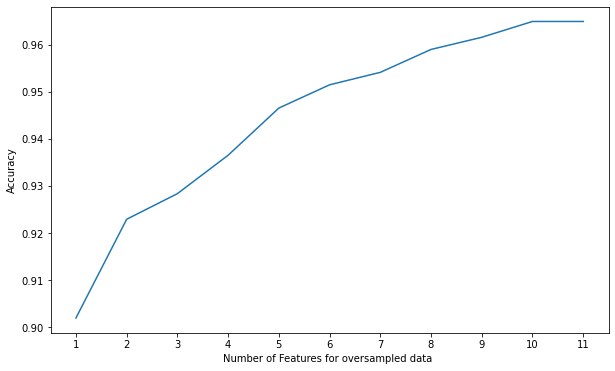

In [149]:
loc = np.arange(1,12,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,12), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Features for oversampled data ')
plt.ylabel('Accuracy')
plt.show()

considering all the features helps perform the model optimally in oversampling 

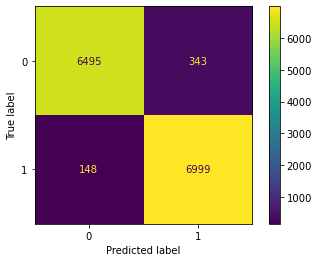

In [150]:
etc = LGBMClassifier()
etc.fit(x_train , y_train)
    
predictions = etc.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=etc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=etc.classes_)
disp.plot()

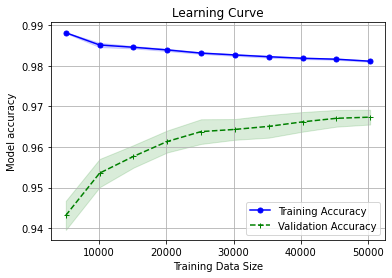

In [107]:
train_sizes, train_scores, test_scores = learning_curve(estimator=LGBMClassifier(), X=x_train, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Ploting the learning curve

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

For training sample size less than 3000, the difference between training and validation accuracy is much larger. This is the case of overfitting

For training size greater than 3000, the model is better. It is a sign of good bias-variance trade-off.

UNDERSAMPLING

In [157]:
print("Before Undersampling, counts of label '1': {}".format(sum(y == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y == 0)))
  
# apply near miss
from imblearn.under_sampling import NearMiss
nr = NearMiss()
  
x_new, y_new = nr.fit_sample(x, y.ravel())
  
print('After Undersampling, the shape of train_X: {}'.format(x_new.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_new.shape))
  
print("After Undersampling, counts of label '1': {}".format(sum(y_new == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_new == 0)))

Before Undersampling, counts of label '1': 2525
Before Undersampling, counts of label '0': 34961 

After Undersampling, the shape of train_X: (5050, 11)
After Undersampling, the shape of train_y: (5050,) 

After Undersampling, counts of label '1': 2525
After Undersampling, counts of label '0': 2525


In [158]:
x_train  , x_test , y_train , y_test = train_test_split(x_new , y_new, test_size = 0.2 , random_state = 0)

In [97]:
# Extra Trees Classifier 
extra_clf = ExtraTreesClassifier()
extra_scores = cross_val_score(extra_clf, x_train, y_train, cv=5)
extra_mean = extra_scores.mean()

# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf, x_train, y_train, cv=5)
grad_mean = grad_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestClassifier()
rand_scores = cross_val_score(rand_clf, x_train, y_train, cv=5)
rand_mean = rand_scores.mean()

# LGBM Classifier
lgbm_clf = LGBMClassifier()
lgbm_scores = cross_val_score(lgbm_clf, x_train, y_train, cv=5)
lgbm_mean = lgbm_scores.mean()

# KNeighbors Classifier
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, x_train, y_train, cv=5)
knn_mean = knn_scores.mean()

#Perceptron
per = Perceptron()
per_scores = cross_val_score(per, x_train, y_train, cv=5)
per_mean = per_scores.mean()


d = {'Classifiers': ["ExtraTreesclf" , "GradientBosstingclf" , "RandomForest" ,"LGBMclf" , "KNN" , "Perceptron" ], 
    'Crossval Mean Scores': [extra_mean , grad_mean , rand_mean , lgbm_mean , knn_mean , per_mean]}

result_df = pd.DataFrame(data=d)

In [98]:
result_df.sort_values(by = ["Crossval Mean Scores"] , ascending = False)

,Classifiers,Crossval Mean Scores
1,GradientBosstingclf,0.771040
3,LGBMclf,0.765347
2,RandomForest,0.743564
0,ExtraTreesclf,0.741584
4,KNN,0.724752
5,Perceptron,0.558911


In [102]:
mean_acc = np.zeros(11)
for i in range(1,12):
    etc = GradientBoostingClassifier()
    x_new_ = SelectKBest(f_classif, k = i).fit_transform(x_new , y_new )
    x_train  , x_test , y_train , y_test = train_test_split(x_new_ , y_new , test_size = 0.2 , random_state = 0)
    etc.fit(x_train , y_train)
    yhat= etc.predict(x_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)
mean_acc    


array([0.73465347, 0.76039604, 0.75841584, 0.75940594, 0.78019802,
       0.78811881, 0.78811881, 0.79009901, 0.7970297 , 0.8029703 ,
       0.8029703 ])

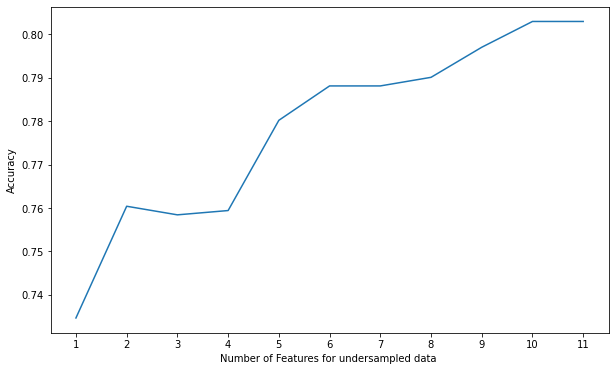

In [103]:
loc = np.arange(1,12,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,12), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Features for undersampled data ')
plt.ylabel('Accuracy')
plt.show()

considering all the features helps perform the model optimally in undersampling 

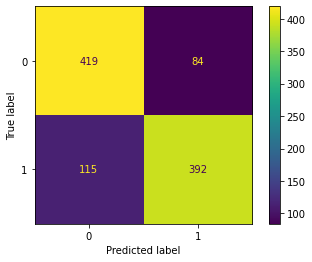

In [104]:
etc = GradientBoostingClassifier()
etc.fit(x_train , y_train)
    
predictions = etc.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=etc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=etc.classes_)
disp.plot()

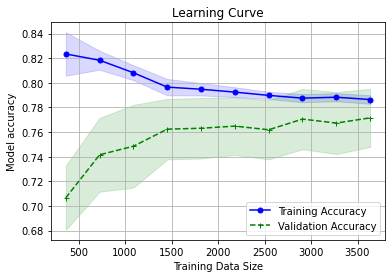

In [112]:
train_sizes, train_scores, test_scores = learning_curve(estimator=GradientBoostingClassifier(), X=x_train, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Ploting the learning curve

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

For training sample size less than 1500, the difference between training and validation accuracy is much larger. This is the case of overfitting

For training size greater than 1500, the model is better. It is a sign of good bias-variance trade-off.

In [161]:
gbc = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

In [162]:
cv = GridSearchCV(gbc,parameters,cv=5)
cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 50, 250, 500]})

In [163]:
cv.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 250}

In [174]:
#improving scores
grad_clf = GradientBoostingClassifier(learning_rate =  0.1, max_depth = 3, n_estimators = 250)
grad_scores = cross_val_score(grad_clf, x_train, y_train, cv=5)
grad_mean = grad_scores.mean() ; grad_mean

0.7722772277227723

In [177]:
from sklearn.metrics import f1_score , precision_score , recall_score
grad_clf.fit(x_train , y_train)
pred = grad_clf.predict(x_test)
print('Precision Score: ', precision_score(y_test, pred))
print('Recall Score: ', recall_score(y_test, pred))

Precision Score:  0.8206185567010309
Recall Score:  0.7850098619329389


In [180]:
from sklearn.metrics import f1_score , roc_auc_score
f1_score(y_test, pred)

0.8024193548387096

In [181]:
y_pred = grad_clf.predict_proba(x_test)[:, 1]

(1010,)

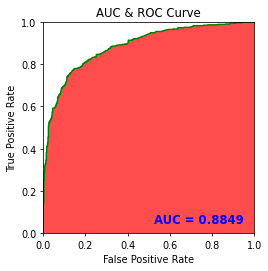

In [183]:
auc = roc_auc_score(y_test, y_pred)

false_positive_rate, true_positive_rate, thresolds = roc_curve(y_test, y_pred)

plt.figure(figsize=(6, 4), dpi=70)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='red', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()  

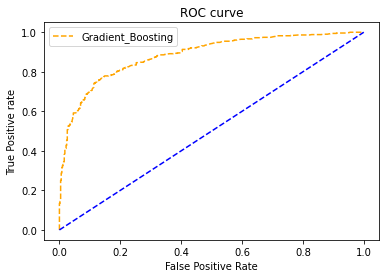

In [184]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

plt.plot(false_positive_rate, true_positive_rate, linestyle='--',color='orange', label='Gradient_Boosting')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();